In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open('../styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()

# Vortex panels
This notebook introduces vortex panels, which will be the foundation of our numerical method for 2D-potential flows.

## General Vortex Sheet

Consider a 2D vortex sheet defined along a curve $\cal S$. The sheet is characterized by a *strength* $\gamma(s)$, where $s$ is the coordinate along the sheet. An infinitesimal segment of this sheet is an infinitesimal point-vortex with strength $d\Gamma = \gamma ds$. Therefore we can integrate the potential for a point vortex

$$ \phi = \frac{\Gamma}{2\pi}\theta $$

to define the potential function for a vortex sheet as

$$ \phi(x,y) = \int_{\cal S} \frac{\gamma(s)}{2\pi}\theta(x,y,s)\ ds $$

where $\theta$ is the angle from $s$ to the point at which we evaluate the potential. As always, the velocity is defined from the potential as

$$ u = \frac{\partial\phi}{\partial x}, \quad v = \frac{\partial\phi}{\partial y} $$


## Vortex Panel

![image](resources/graphics1.png)


Now consider a vortex sheet with a constant strength defined on the line segments from $-S,S$ along the $x$-axis. This will be our prototype __vortex panel__.

In this case, we can pull $\gamma$ out of the integral equation above and evaluate it analytically. The result is:

$$ u = -\left.\frac{\gamma}{2\pi}\theta\,\right|^{+S}_{-S} = -\frac{\gamma}{2\pi}\left[\theta_{+S}-\theta_{-S}\right]\ ,\quad 
v = -\left.\frac{\gamma}{2\pi} \ln r\,\right|^{+S}_{-S} = -\frac{\gamma}{4\pi} \ln\left(\frac{r_{+S}^2}{r_{-S}^2}\right) $$

where $\theta_{\pm S} = \arctan(y/(x\mp S))$ and $r_{\pm S}^2 = (x\mp S)^2+y^2 $ are the angle and distance from the positive or negative end of the panel to the point $(x,y)$.

## Numerical implementation

The equations are pretty simple - but that doesn't make them easy to visualize. Let's make a picture of the velocity field induced by a vortex panel. 

As usual, we will start by importing some helpful python modules: the numeric module `numpy` and the plotting module `pyplot`. Then we can write a function to evaluate the velocity equations defined above:

_Note: If you aren't familiar with importing or defining functions in python, please review the Quick Python Introduction notebook._

In [12]:
# we only need to import once in a notebook
import numpy                   # import numerical library
from matplotlib import pyplot  # import plot library
%matplotlib notebook

def uv_per_g( x, y, S ):
    dtheta = numpy.arctan2(y,x-S)-numpy.arctan2(y,x+S)
    dlogr = 0.5*numpy.log(((x-S)**2+y**2)/((x+S)**2+y**2))
    return -numpy.array([dtheta,dlogr])/(2.*numpy.pi)

Notice that there is something special about this function:

##### Fluids fundamental: linearity
##### The vortex panel velocity equations are linear in $\gamma$

The velocity functions are nonlinear in terms of the geometry (`log`, `arctan`, etc) but linear in terms of the vortex panel strength. I've made that explicit by defining the velocity per unit $\gamma$. _This linear dependance on the strength will be instrumental in the next notebook._

Now let's plot it. We'll do this by evaluating the function on a grid of points. In the code below I use `linspace` to evenly divide up a line segment into an array points and `meshgrid` to create two two-dimensional arrays to fill the space.

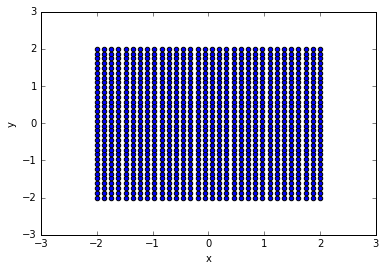

In [3]:
# set up grid points
line = numpy.linspace(-2, 2, num=32)  # creates array of points between -2 and 2
x, y = numpy.meshgrid(line, line)     # generates a 2D grid of points

# plot it
pyplot.scatter(x, y)            # plot grid points 
pyplot.xlabel('x')              # label x 
pyplot.ylabel('y')              # label y

Next, we need to plot the induced flow at each of these points. Since we'll do this repeatedly we'll write this as a function.

##### Coding fundamental: Functions
##### Don't ever write the same code twice!

We'll use color contours to show the velocity magnitude (`contourf` with `colorbar` for the legend) and arrows to show the velocity vectors (`quiver`). We'll also make a function to plot the sheet as a black line.

In [4]:
def plot_uv(x,y,u,v):
    pyplot.figure(figsize=(6,5))                    # set figure size
    m = numpy.sqrt(u**2+v**2)                       # compute velocity magnitude
    velocity = pyplot.contourf(x, y, m, vmin=0)     # plot magnitude contours
    pyplot.quiver(x, y, u, v)                       # plot vector field
    cbar = pyplot.colorbar(velocity)                # color bar
    cbar.set_label('Velocity magnitude');           # label color
    pyplot.xlabel('x')                              # label x
    pyplot.ylabel('y')                              # label y

def plot_sheet(S):
    pyplot.plot([-min(S,2),min(S,2)],[0,0],'k-',lw=2) # draw the vortex sheet

Now we can compute the velocity on the grid and plot it

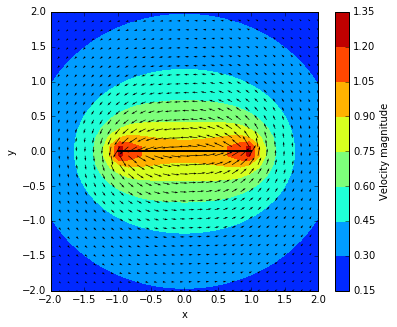

In [5]:
# set up grid points
line = numpy.linspace(-2, 2, num=32)  # creates array of points between -2 and 2
x, y = numpy.meshgrid(line, line)     # generates a 2D grid of points

# get velocity
gamma = 2 ; S = 1.0               # define panel strength and extent
u,v = gamma*uv_per_g(x,y,S)           # compute velocity

# plot it
plot_uv(x,y,u,v)
plot_sheet(S)

##### Quiz

What shape do the streamlines make when you are sufficiently far from the body?

1. Ellipses
2. **Circles**
3. Straight lines

(Hint: This is an *interactive* notebook - which parameter can you vary to answer the question?)

##### Quiz

What is the u,v velocity of points very near the center of the vortex sheet?

1. $u=0,\ v=\sqrt\gamma$
2. **$u=\pm\frac 12 \gamma,\ v=0$**
3. $u=\gamma,\ v=\pm\gamma$

---

This is a fundamental feature of vortex sheets that we will use repeatedly:

##### Fluids fundamental: velocity jump
##### Vortex sheets induce a tangential jump in the velocity field

The tangential velocity jump across the sheet is $\Delta u=-\gamma$.

## Background flow

Next, lets add a uniform background flow with magnitude one at angle $\alpha$.

$$ U_\infty = \cos\alpha,\quad V_\infty = \sin\alpha $$

How can we include this to the panel flow? It's trivial:

##### Fluids fundamental: Superposition
##### Potential flow solutions can be added together to generate new solutions

Using *superposition* the total velocity is just the sum of the vortex sheet and uniform flow.

<IPython.core.display.Javascript object>


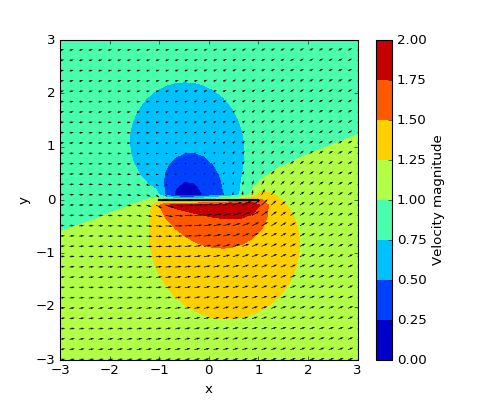

In [13]:
alpha = numpy.pi/10      # free-stream angle
U_inf = numpy.cos(alpha) # free-stream in x
V_inf = numpy.sin(alpha) # free-stream in y

# superimpose to get velocity
gamma = 2*U_inf       # sheet strength
S = 1                    # sheet extents
u,v = gamma*uv_per_g(x,y,S)
u = u+U_inf
v = v+V_inf

# plot it 
plot_uv(x,y,u,v)
plot_sheet(S)

##### Quiz

How can you make the stagnation point touch the vortex sheet?

1. Set $\alpha=0$
2. **Set** $\gamma=\pm 2 U_\infty$
3. Set $S = \infty$

## General vortex panel

Finally, we would like to be able to compute the flow induced by a vortex panel defined between any two points $x_0,y_0$ and $x_1,y_1$. We could start from scratch, re-deriving the potential and velocity fields. But why would we want to do that?

##### Coding fundamental: Reuse
##### Recast problems to reuse existing code!

By switching from the global coordinates to a *panel-based* coordinate system, we can transform any vortex panel to match our previous example. After computing the velocity using our old functions, we just need to rotate the vector back to the global coordinates.

---
![image](resources/graphics0.png)

---

## VortexPanel module

I've written a set of functions which follows the method described above to define a general vortex panel. These functions define a `Panel`, and are found in the `VortexPanel` module.

In [7]:
from VortexPanel import Panel

This makes the `Panel` class available, and you can use the `help` function to see what is in the class:

In [8]:
help(Panel)

Help on class Panel in module VortexPanel:

class Panel(builtins.object)
 |  Vortex panel class
 |  
 |  Attributes:
 |  xc,yc -- the x and y location of the panel center
 |  S     -- the half-width of the panel
 |  sx,sy -- the x and y component of the tangent unit vector
 |  gamma -- the panel vortex strength
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x0, y0, x1, y1, gamma=0)
 |      Initialize a panel between two points
 |      
 |      Inputs:
 |      x0,y0 -- the x and y location of the starting point
 |      x1,y1 -- the x and y location of the ending point
 |      gamma -- the panel vortex strength; defaults to zero
 |      
 |      Outputs:
 |      A Panel object.
 |      
 |      Examples:
 |      p_1 = vp.Panel(-1,0,1,0)    # make panel on x-axis with gamma=0
 |      p_2 = vp.Panel(0,-1,0,1,4)  # make panel on y-axis with gamma=4
 |  
 |  plot(self, style='k')
 |      Plot the vortex panel as a line segment
 |      
 |      Inputs:
 |      style -- a string defini

The `Panel` class is written in an [Object Oriented Programming](https://realpython.com/python3-object-oriented-programming/#what-is-object-oriented-programming-oop) style.

##### Coding fundamental: Objects
##### Object-Oriented Programming helps organize data and functions

From the help, we can see that `Panel` contains the properties of a given panel (the `attributes`) such as the panel centroid, size, and strength. This clean way of organizing the data will be very handy when we start dealing with multiple panels.

`Panel` also contains functions (the `methods`) which can be applied to it`self` such as plotting the panel and determining the panel'\s induced velocity. This avoids needing to pass the data about the panel to the function - it's already all built-in!

Let's test it out:

x_c=0.10000000000000003, y_c=-0.09999999999999998, S=1.0


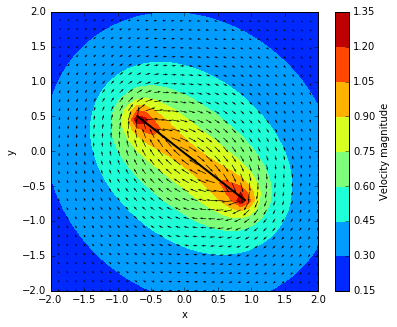

In [9]:
# define my_panel
my_panel = Panel(x0=-0.7,y0=0.5,x1=0.9,y1=-0.7,gamma=-2)

# check my_panel's attributes
print('x_c={}, y_c={}, S={}'.format(my_panel.xc,my_panel.yc,my_panel.S))

# apply my_panel's velocity method on the x,y grid
u,v = my_panel.velocity(x,y)
plot_uv(x,y,u,v)

# plot my_panel
my_panel.plot()

## Summary

Let's review the fundamental properties of vortex panels:
- The velocity they induce is **linear** in $\gamma$.
- The **jump** in tangential velocity across a panel is $-\gamma$.
- The panel velocity can be **superimposed** with any other potential flow.
- The `Panel` object holds the properties and functions associated with each panel.

These properties make `Panel` the perfect building block for a potential flow solver.

##### Your turn #1

Use superposition to compute a flow moving between **two** parallel plates with opposite vortex strength.

 - ** Complete ** the code below by adding the contribution of the panels.
 - ** Adjust ** the strength until the flow stagnates.
 - ** Discuss ** what types of flow you could model with more panels

---

##### Solution #1

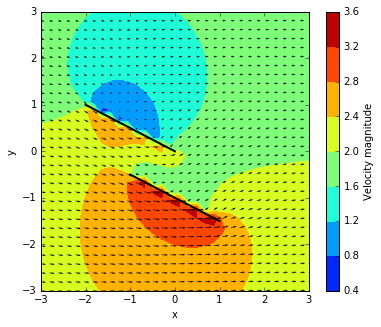

In [10]:
# set up grid points
line = numpy.linspace(-3, 3, num=32)  # creates array of points between -2 and 2
x, y = numpy.meshgrid(line, line)     # generates a 2D grid of points

# Your turn!
gamma = 2                # strength
yc = 0.5               # spacing

panel_1 = Panel(x0=-1, y0= -yc, x1=1, y1=-3*yc, gamma=gamma)
panel_2 = Panel(x0=-2, y0= 2*yc, x1=0, y1=0, gamma=gamma)

u = 2*numpy.ones_like(x)          # free-stream in x
v = numpy.zeros_like(y)         # free-stream in y

# compute velocity by superposition
u = u + panel_1.velocity(x,y)[0] + panel_2.velocity(x,y)[0]
v = v + panel_1.velocity(x,y)[1] + panel_2.velocity(x,y)[1]

# plot it
plot_uv(x, y, u, v)     # plot the flow on the grid
panel_1.plot()          # plot panel_1
panel_2.plot()          # plot panel_2
